# 第5回 課題２ 解説

# SIR model
感染症の流行過程を記述するモデル  
$S$: 感受性保持者（susceptible）  
$I$: 感染性保持者（Infectious）  
$R$: 回復者（Recovered） or 隔離者（Removed）  
$$
\begin{cases}
\frac{dS(t)}{dt} = -\beta S(t) I(t)\\
\frac{dI(t)}{dt} = \beta S(t) I(t) - \gamma I(t)\\
\frac{dR(t)}{dt} = \gamma I(t)
\end{cases}
$$
  
$R_0$: 基本再生産数
$$
R_0=\frac{\beta S(0)}{\gamma}
$$
  
$z=\frac{R(\infty)}{S(\infty)+I(\infty)+R(\infty)}$: 最終規模（final size）  
  
最終規模方程式（final size equation）  
$R_0$と最終規模の関係
$$
1-z=\exp(-zR_0)
$$
  
$$
R_0=-\frac{\ln(1-z)}{z}
$$

In [7]:
%matplotlib inline

In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def sir(betaf,gammaf,x0f,y0f,z0f):
    dt = 0.0001
    t= 0
    x = x0f
    y = y0f
    z = z0f
    xList = [x]
    yList = [y]
    zList = [z]
    tList = [t]
    for i in range(500000):
        t = dt*(i+1)
        xx = x + dt*(-betaf*x*y)
        yy = y + dt*(betaf*x*y-gammaf*y)
        zz = z + dt*(gammaf*y)
        x = xx
        y=yy
        z=zz
        tList.append(t)
        xList.append(x)
        yList.append(y)
        zList.append(z)
        
    out = np.array([tList,xList,yList,zList])
    return out

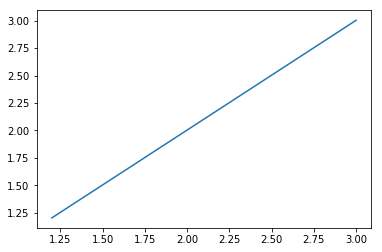

In [11]:
r0List = []
r0fsList = []

for j in range(10):
    beta=0.001+(0.0002*(j+1))
    gamma = 1
    x0 = 1000
    y0 = 1
    z0 = 0
    
    r0 = beta*x0/gamma
    r0List.append(r0)
    
    sir_out=sir(beta,gamma,x0,y0,z0)
    
    fs = sir_out[3][-1]/(sir_out[1][-1]+sir_out[2][-1]+sir_out[3][-1]) #最終規模
    r0fs = -math.log(1-fs)/fs
    r0fsList.append(r0fs)
    
plt.plot(r0List,r0fsList)
